In [1]:
import matplotlib.pyplot as plt

import numpy as np

In [41]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if not isinstance(points,np.ndarray):
        points = np.array(points)
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_homsf(homsf_id, ax = None,ax2 = None):

#     homsf_id = "2.10.25.10"
#     homsf_id = "3.30.200.20"
    # homsf_id = "2.40.50.140"
    lst = ( x for x in homsf_id.split('.'))
    homsf = classification.objects.get(Class=next(lst,None),
                                arch=next(lst,None),
                                topo=next(lst,None),
                                homsf=next(lst,None),
                                s35=next(lst,0),)


    s35set = homsf.classification_set.all()

    plist = [];
    for s35 in s35set:
        d = s35.domain_set.all()[0];
    #     print( d.domain_length)
        plist.append([d.domain_length, d.nDOPE])
    outs = is_outlier([y for x,y in plist],3.0);
    

    pData=np.array(plist);
#     ax.plot(pData[:,0],pData[:,1],'x',1, label = homsf_id)
    outData = [];
    for point,out in zip(plist,outs):
        if out:
            outData.append(point)
    outData = np.array(outData);
            
    
    ax.scatter(pData[:,0],pData[:,1],label = homsf_id)
#     print(outData)
    if outData.any():
#     print(outData.shape)
        ax.plot(outData[:,0],outData[:,1],3,'x',linewidth=0,label = homsf_id+'_outlier')
    
    ax.set_ylim([-4,4])
    ax2.hist(pData[:,1],np.linspace(-3,3,50), label = homsf_id, alpha = 0.5)

In [5]:
%matplotlib inline
homsfs = classification.homsf_objects.all().filter(s35_count__gte=100).order_by("-nDOPE_std")

NameError: name 'mdl' is not defined

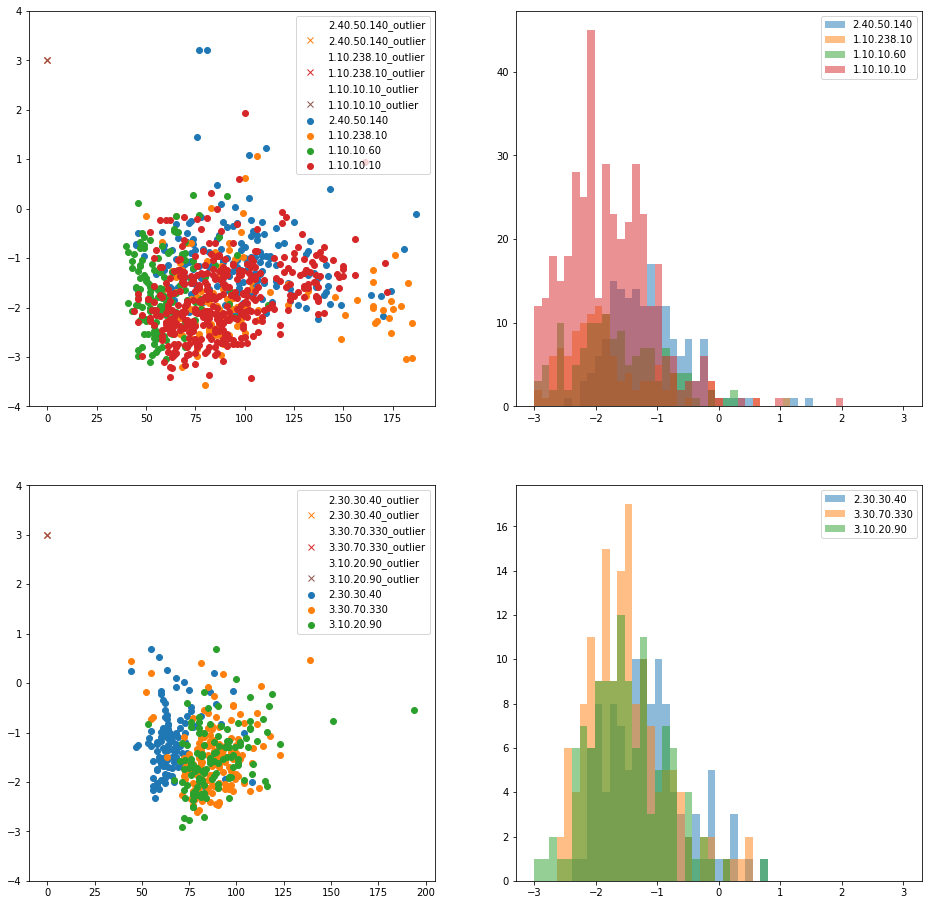

In [42]:
plt.close("all")
fig = plt.figure(figsize = [16,16])
# ax1 = fig.add_subplot(111)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ilst = xrange(0,4);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax1,ax2)
ilst = xrange(5,8);
for i in ilst:
    plot_homsf(homsfs[i].superfamily(),ax3,ax4)


for ax in [ax1,ax2,ax3,ax4]:
    ax.legend()

# plot_homsf("2.30.29.30",ax3)
# plot_homsf("3.30.200.20",ax3)
# plot_homsf("2.40.50.140",ax3)
# plot_homsf("2.30.30.40",ax4)
# plot_homsf("2.60.120.10",ax4)
# plot_homsf("2.40.10.10",ax4)
#     #     print(d.nDOPE)

# dset.nDOPE